# Biol 359  |  Principal Component Analysis
### Spring 2021, Week 5

<hr style="border:2px solid gray"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import breast cancer data 

In [3]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

/Users/neda.bagheri/Library/Python/3.7/lib/python/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/Users/neda.bagheri/Library/Python/3.7/lib/python/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision

#### Determine size of data

In [4]:
breast_data.shape

(569, 30)

#### Evaluate/assess data

In [5]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


#### Plot data in 2D

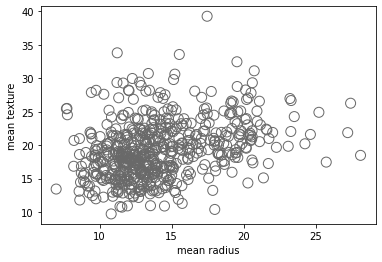

In [6]:
feature1 = 'mean radius'
feature2 = 'mean texture'

x = breast_dataset[feature1]
y = breast_dataset[feature2]

colors = (0.5,0.5,0.5)
plt.scatter(x, y, s=100, facecolors='none', edgecolors='dimgray')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

#### Center data. Re-evaluate/reassess output.

In [ ]:
from sklearn.preprocessing import StandardScaler
centered_breast_dataset = StandardScaler().fit_transform(breast_dataset)
centered_breast_dataset.shape


In [ ]:
centered_breast_datasetset = pd.DataFrame(centered_breast_dataset)
centered_breast_dataset.head()

#### Solve for the covariance matrix

#### Solve for the eigen decomposition of the covariance matrix

#### Solve for and plot the cumulative scree plot

#### Identify the feature that contributes most to PC1

#### Transform data to smaller dimensional space

#### Visualize transformed data

In [ ]:
# Plot helper functions
def mean_vector(data):
    
    return np.array([np.mean(data, axis=1)]).T

def covariance_matrix(data):
    num_of_samples = data.shape[1]
    mu = mean_vector(data)
    data_centered = data - mu
    return (data_centered @ data_centered.T) / (num_of_samples - 1)

def plot_xy(ax, data, *args, **kwargs):
    ax.plot(data[0], data[1], *args, **kwargs) 
    
def plot_eigen(ax, eig_vals, eig_vecs, offset=(0,0), *args, **kwargs):
    for eig_val, eig_vec in zip(eig_vals, eig_vecs): 
        line = np.array([[offset[0], eig_val*eig_vec[0]+offset[0]], [offset[1], eig_val*eig_vec[1]+offset[1]]])
        ax.plot(line[0], line[1], *args, **kwargs)
        
def plot_hist(ax, data, mean_color='orange', std_color='red', *args, **kwargs):
    ax.hist(data, *args, density=True, **kwargs);
    mean = np.mean(data)
    std = np.std(data)

    mean_lines_a = [mean, mean]
    std_lines_a = [mean+std, mean+std, None, mean-std, mean-std]
    if 'orientation' in kwargs.keys() and kwargs['orientation'] == 'horizontal':
        mean_lines_b = [0, ax.get_xlim()[1]]
        ax.plot(mean_lines_b, mean_lines_a, color=mean_color)
        std_lines_b = [0, ax.get_xlim()[1], None, 0, ax.get_xlim()[1]]
        ax.plot(std_lines_b, std_lines_a, color=std_color)
        ax.set_xlabel('frequency')
        ax.set_ylabel(r'${}$'.format(kwargs['label']))
    else:
        mean_lines_b = [0, ax.get_ylim()[1]]
        ax.plot(mean_lines_a, mean_lines_b, color=mean_color)
        std_lines_b = [0, ax.get_ylim()[1], None, 0, ax.get_ylim()[1]]
        ax.plot(std_lines_a, std_lines_b, color=std_color)
        ax.set_ylabel('frequency')
        ax.set_xlabel(r'${}$'.format(kwargs['label']))


def plot_data(data, title, dims=['x', 'y']):
    mu = mean_vector(data)
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])
    eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix(data))
    u, s, v = np.linalg.svd(covariance_matrix(data))
    transform = u.T @ np.diag(np.sqrt(s)) @ u
    transformed_circle = transform @ circle + mu

    fig, axs = plt.subplots(2, 2)
    fig.suptitle(title)
    for ax in axs.reshape(-1):
        ax.grid(True)
    axs[1, 0].axis('off')
    plot_xy(axs[0, 1], data, '.')
    plot_xy(axs[0, 1], mu, 'o', color='orange')
    plot_xy(axs[0, 1], transformed_circle, color='red')
    plot_hist(axs[1, 1], data[0], bins=100, label=dims[0]);
    plot_hist(axs[0, 0], data[1], bins=100, label=dims[1], orientation='horizontal');
    
    max_x = np.max(data[0])
    min_x = np.min(data[0])
    max_y = np.max(data[1])
    min_y = np.min(data[1])
    
    limits_min = min(min_x, min_y)
    limits_max = max(max_x, max_y)

    axs[0, 0].set_ylim(limits_min, limits_max)
    axs[0, 1].set_ylim(limits_min, limits_max)
    axs[0, 1].set_xlim(limits_min, limits_max)
    axs[1, 1].set_xlim(limits_min, limits_max)
    plt.show()
    
# Print helper functions
def print_eigen(matrix, name='A'):
    w, v = np.linalg.eig(matrix)
    print('Matrix "{}" is \n{}'.format(name, matrix))
    print()
    print('Matrix "{}" is decomposed into its:'.format(name))
    print('Eigenvalues:\n{}'.format(np.diag(w)))
    print('Eigenvectors:')
    for this_v in v:
        print(this_v)
        
def print_svd(matrix, name='matrix', print_v=False):
    u, s, v = np.linalg.svd(matrix, full_matrices=False)
    print('Sigular Value decomposition of {}:\n{}'.format(name, matrix))
    print('Sigular values: {}'.format(s))
    print('U Matrix:')
    for this_u in u:
        print(this_u)
    
    if print_v:
        print('V Matrix:')
        for this_v in v:
            print(this_v)

In [ ]:
# Helper functions
def create_2d_transform(eigenvalues=(1, 1), first_component_vector=(1, 0), verbose=False, plot=False):
    # Normalize first component vector
    component_0 = np.array(first_component_vector) / np.linalg.norm(first_component_vector)
    # Create second component vector as the orthgonal vector to the first component vector
    component_1 = np.array([-component_0[1], component_0[0]])
    
    # Define matrix of eigenvalues
    eigen_values = np.array([val for val in eigenvalues])
    # Define matrix of eigenvectors 
    eigen_vectors = np.array([component_0, component_1])
    
    # Create transform matrix
    transform = eigen_vectors.T @ np.diag(eigen_values) @ eigen_vectors
    
    if verbose:
        # Confirm with eigenvalue decomponsition of transform matrix
        print_eigen(transform, name='A')
    
    if plot:
        theta = np.linspace(0, 2*np.pi, 100)
        circle = np.array([np.cos(theta), np.sin(theta)])
        fig, axs = plt.subplots(1, 2)
        plot_xy(axs[0], circle, '.')
        plot_eigen(axs[0], np.array([1, 1]), eigen_vectors)
        plot_xy(axs[1], transform.dot(circle), '.')
        plot_eigen(axs[1], eigen_values, eigen_vectors)
        
        for ax in axs.reshape(-1):
            ax.axis('equal')
            ax.grid(True)
            ax.set_xlim(-1.1*max(eigen_values), 1.1*max(eigen_values))
        plt.show()
    
    return transform

def generate_bivariate_data(transform, mean=(0,0), num_of_samples=2000, verbose=False, plot=False):
    # Create data matrix
    mu = np.array([mean]).T
    data_unit_centered = np.random.normal(0, 1, size=[2, num_of_samples])
    data_centered = transform @ data_unit_centered
    data = data_centered + mu
    cov = covariance_matrix(data)

    if verbose:
        # Confirm with eigendecompostion and SVD of covariance matrix
        print_eigen(cov, name='outer product of A')
        print()
        # print_svd(data / np.sqrt(num_of_samples-1), name='Data Matrix')
        
    if plot: 
        plot_data(data, 'Plot of bivariate data')
    
    return data

def axis_align_data(data):
    cov = covariance_matrix(data)
    eigen_vals, eigen_vecs = np.linalg.eig(cov)
    mu = mean_vector(data)
    data_centered = data - mu
    return eigen_vecs.T @ data_centered
    

In [ ]:
# Create transform
transform_p1 = create_2d_transform(eigenvalues=(1, 5), first_component_vector=(3, -1), verbose=True, plot=True)

In [ ]:
# Create transform
transform_p2 = create_2d_transform(eigenvalues=(1, 5), first_component_vector=(3, -1), verbose=True, plot=True)

# Generate Data
data_p2 = generate_bivariate_data(transform_p2, mean=(0, 0), verbose=True, plot=True)

In [ ]:
# Transform data to align pricipal components with axes

#Make a transform
transform_p3 = create_2d_transform(eigenvalues=(1, 5), first_component_vector=(3, -1), verbose=True, plot=True)

#Generate data from transform
data_p3 = generate_bivariate_data(transform_p3, mean=(0, 0), verbose=True, plot=True)

#Visualize problem 3 data
mu = mean_vector(data_p3)
data_centered = data_p3 - mu
data_aligned = axis_align_data(data_p3)
plot_data(data_aligned, "Principal component plots", dims=['PC1', 'PC2'])